#### Importing Dependencies

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#### Importing Data & Analysis

In [24]:
df = pd.read_csv("Boston House Price Data.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM - Per Capita Crime Rate by town

ZN - Proportion of Residential Land Zoned for lots over 25,000 sq.ft.

INDUS - Proportion of Non-retail Business acres per town

CHAS - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX - Nitric Oxides Concentration (parts per 10 million)

RM - Average Number of Rooms per dwelling

AGE - Proportion of Owner-occupied units built prior to 1940

DIS - Weighted Distances to Five Boston Employment Centres

RAD - Index of Accessibility to Radial Highways

TAX - Full-value Property-tax rate per 10,000 dollars

PTRATIO - Pupil-Teacher Ratio by town\

B - "1000(Bk - 0.63)^2" where Bk is the proportion of Blacks by town

LSTAT - Percentage Lower Status of the Population

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
df.shape

(506, 14)

In [27]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [28]:
corr = df.corr()

<Figure size 1400x1400 with 0 Axes>

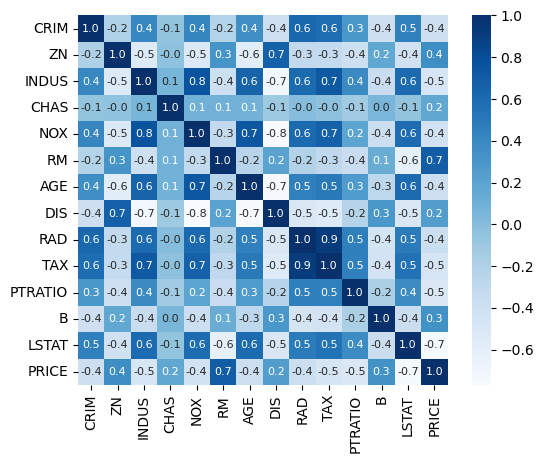

<Figure size 1400x1400 with 0 Axes>

In [29]:
sns.heatmap(corr, fmt='0.1f',square=True, annot=True, cmap='Blues', annot_kws={'size':8})
plt.figure(figsize=(14,14))


In [30]:
X = df.drop(columns="PRICE", axis=1)
y = df["PRICE"]

In [31]:
print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [32]:
print(y.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [34]:
print(X.shape, X_train.shape, X_test.shape )

(506, 13) (404, 13) (102, 13)


### Model Training

In [35]:
model = XGBRegressor()

In [36]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [37]:
training_pred = model.predict(X_train)
score_r2 = metrics.r2_score(training_pred,y_train)
score_mse = metrics.mean_squared_error(training_pred, y_train)

In [38]:
print("Accuracy score of training data is R_squared_error: ", score_r2)
print("Mean Squared Error: ", score_mse)

Accuracy score of training data is R_squared_error:  0.999996982046606
Mean Squared Error:  0.0002620971899759447


In [39]:
y_pred = model.predict(X_test)
test_score_r2 = metrics.r2_score(y_pred,y_test)
test_score_mse = metrics.mean_squared_error(y_pred,y_test)

In [40]:
print("Accuracy score of training data is R_squared_error: ", test_score_r2)
print("Mean Squared Error: ", test_score_mse)

Accuracy score of training data is R_squared_error:  0.8869151458581673
Mean Squared Error:  6.909231565384943


Text(0, 0.5, 'Predicted data')

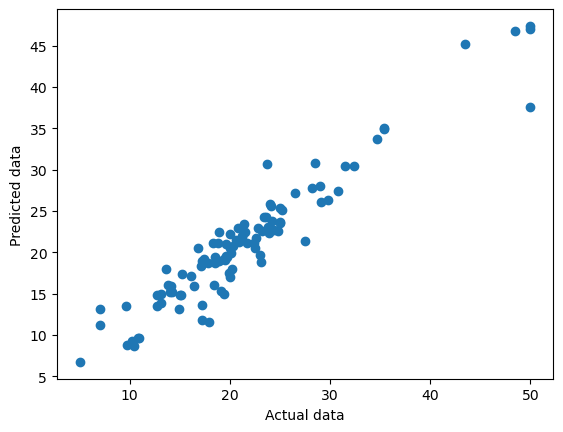

In [41]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")

### Creating a Predictive system

In [45]:
input_data = [0.01632,18.0,2.91,0.0,0.538,6.575,65.2,4.09,1.0,396.0,15.3,396.9,4.98]

input_data_as_array = np.asarray(input_data)

input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print("The price of house is : $",prediction[0]*1000)

The price of house is : $ 25737.812042236328


In [46]:
#dumping model
import pickle
with open("model.pkl","wb") as file:
    pickle.dump(model, file)